<a href="https://colab.research.google.com/github/GiriRallapalli/Categorical-Features/blob/master/Copy_of_Covid_Pred_May30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df1 = pd.read_csv("Covid30.csv")

In [0]:
df1.head(5)
df1.shape

(85, 1)

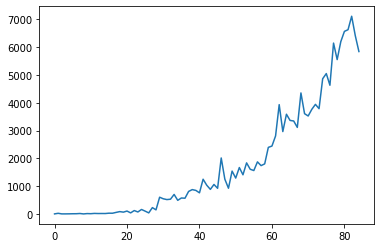

In [0]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [0]:
import numpy as np
print(df1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#print('{1:.2f}%'.format(df1))
print(df1.dtype)

       3
0      1
1     22
2      1
3      1
4      3
..   ...
80  6568
81  6629
82  7113
83  6414
84  5843

[85 rows x 1 columns]
float64


In [0]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [0]:
training_size,test_size

(59, 26)

In [0]:
train_data

array([[1.406e-04],
       [3.093e-03],
       [1.406e-04],
       [1.406e-04],
       [4.218e-04],
       [8.435e-04],
       [9.841e-04],
       [2.109e-03],
       [0.000e+00],
       [1.687e-03],
       [1.125e-03],
       [2.531e-03],
       [1.968e-03],
       [2.109e-03],
       [1.968e-03],
       [3.655e-03],
       [3.515e-03],
       [7.732e-03],
       [1.167e-02],
       [8.998e-03],
       [1.448e-02],
       [5.202e-03],
       [1.701e-02],
       [9.841e-03],
       [2.249e-02],
       [1.406e-02],
       [5.202e-03],
       [3.191e-02],
       [2.053e-02],
       [8.449e-02],
       [7.662e-02],
       [7.254e-02],
       [7.437e-02],
       [9.855e-02],
       [6.875e-02],
       [8.056e-02],
       [7.943e-02],
       [1.137e-01],
       [1.230e-01],
       [1.189e-01],
       [1.067e-01],
       [1.755e-01],
       [1.454e-01],
       [1.241e-01],
       [1.490e-01],
       [1.296e-01],
       [2.830e-01],
       [1.757e-01],
       [1.299e-01],
       [2.166e-01],


In [0]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
time_step = 6
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [0]:
print(X_train.shape), print(y_train.shape)

(52, 6)
(52,)


(None, None)

In [0]:
print(X_test.shape), print(ytest.shape)

(19, 6)
(19,)


(None, None)

In [0]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [0]:
model=Sequential()
model.add(LSTM(3,return_sequences=True,input_shape=(6,1)))
model.add(LSTM(3,return_sequences=True))
model.add(LSTM(3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [0]:
model.summary()


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 6, 3)              60        
_________________________________________________________________
lstm_70 (LSTM)               (None, 6, 3)              84        
_________________________________________________________________
lstm_71 (LSTM)               (None, 3)                 84        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 496ms/step - loss: 0.0156 - val_loss: 0.4941
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0146 - val_loss: 0.4851
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0136 - val_loss: 0.4762
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0127 - val_loss: 0.4673
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0119 - val_loss: 0.4585
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0111 - val_loss: 0.4497
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0104 - val_loss: 0.4409
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0098 - val_loss: 0.4323
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0092 - val_loss: 0.4240
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0088 - val_loss: 0.4158
Epoch 11/100
2/2 [

In [0]:
import tensorflow as tf
tf.__version__


'2.2.0'

In [0]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [0]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [0]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

811.008244237878

In [0]:
math.sqrt(mean_squared_error(ytest,test_predict))

4022.8207284401424

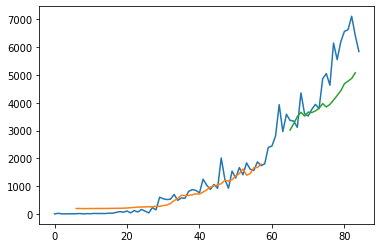

In [0]:
look_back=6
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [0]:
print(len(test_data))

26


In [0]:
x_input=test_data[20:].reshape(1,-1)
x_input.shape

(1, 6)

In [0]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [0]:
from numpy import array

In [0]:
lst_output=[]
n_steps=6
i=0
while(i<6):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,scaler.inverse_transform(yhat)))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1],1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[[[0.923]
  [0.932]
  [1.   ]
  [0.902]
  [0.821]
  [0.73 ]
  [0.73 ]
  [0.73 ]
  [0.73 ]
  [0.73 ]]]
5 day output [[6956.199]]
[[0.7299187779426575], [0.7299187779426575], [0.7299187779426575], [0.7299187779426575], [0.7299187779426575], [0.9779557585716248]]


In [0]:
day_new=np.arange(1,7)
day_pred=np.arange(8,14)
day_new.shape, day_pred.shape

((6,), (6,))

In [0]:
import matplotlib.pyplot as plt

In [0]:
len(df1), scaler.inverse_transform(df1[79:]).shape, scaler.inverse_transform(lst_output).shape

(85, (6, 1), (6, 1))

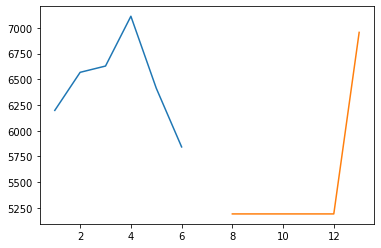

In [0]:
plt.plot(day_new,scaler.inverse_transform(df1[79:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

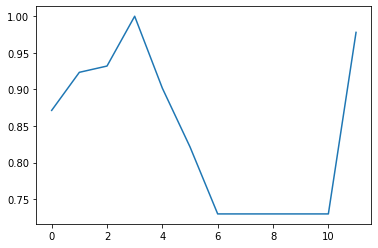

In [0]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[79:])